### 'CONVERTS ANALYTICAL INSIGHTS INTO A CONCRETE CAPITAL ALLOCATION RULE.'

In [2]:
# Now, we are going to decide how much money to allocate to each stock in the portfolio,
# which is called " Capital Allocation ".
# Now, we are going to use " Inverse volatility weighting ".

# Why we are using inverse volatility weighting : 
# 1. High volatility means higher risk, so, giving lower wights
# 2. Low volatility means stability, so, giving higher weights.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [4]:
price_returns = pd.read_csv("../data/processed/price_returns_final.csv", header=[0,1], index_col=0)
returns = price_returns.copy()

In [5]:
# Calculate stock volatility : 

volatility = returns.std()

In [6]:
# Finding inverse of volatility :

inverse_volatility = 1/volatility

In [7]:
# Normalizing weights : 

weights = inverse_volatility/inverse_volatility.sum()

In [8]:
# Creating weighted tables : 

portfolio_weights = pd.DataFrame({
    "Stocks" : weights.index,
    "Weights" : weights.values
})

portfolio_weights.head()

,Stocks,Weights
0,"(AAPL, 0.001728561146504104)",0.058579
1,"(AMZN, 0.0058998892697967875)",0.049881
2,"(BAC, 0.03250468091856051)",0.048577
3,"(CAT, 0.01195499638148112)",0.056201
4,"(CVX, 0.007083567808985336)",0.060952


In [9]:
portfolio_weights.sort_values(by="Weights", ascending=False)
# Weights refers to allocation %


portfolio_weights['Stocks'] = portfolio_weights['Stocks'].apply(lambda x : x[0] if isinstance(x,tuple) else x)
portfolio_weights = portfolio_weights[['Stocks', 'Weights']]
portfolio_weights = portfolio_weights.set_index('Stocks')
portfolio_weights

,Weights
Stocks,
AAPL,0.058579
AMZN,0.049881
BAC,0.048577
CAT,0.056201
CVX,0.060952
GOOGL,0.059722
JNJ,0.097710
JPM,0.058791
MMM,0.070259


In [10]:
# Frzeeing final portfolio_weights :

portfolio_weights.to_csv("../outputs/Tables/portfolio_weights_final.csv", index=True)
portfolio_weights

,Weights
Stocks,
AAPL,0.058579
AMZN,0.049881
BAC,0.048577
CAT,0.056201
CVX,0.060952
GOOGL,0.059722
JNJ,0.097710
JPM,0.058791
MMM,0.070259


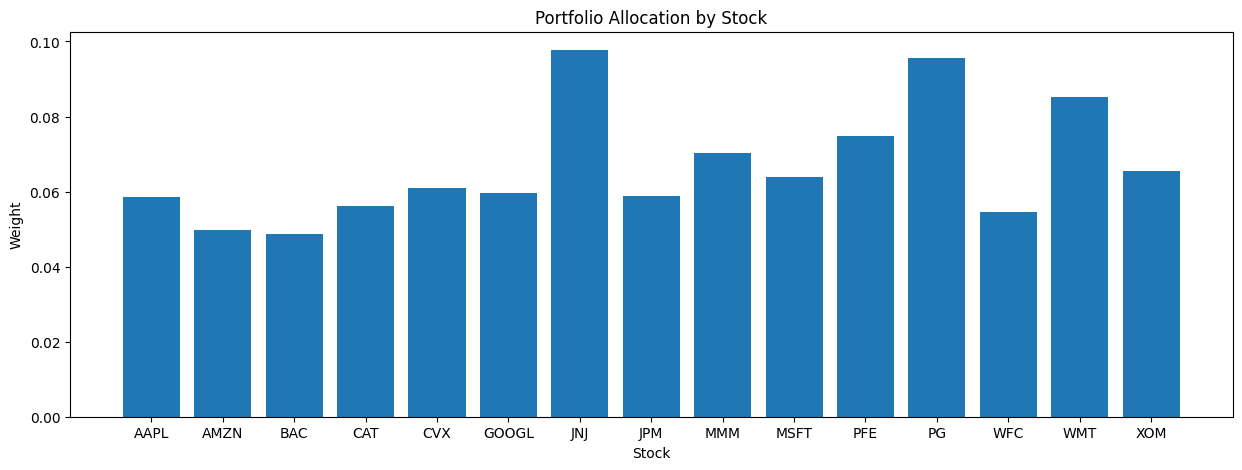

In [11]:
# Visualizing portfolio allocation : 

plt.figure(figsize=(15,5))
plt.bar(portfolio_weights.index, portfolio_weights['Weights'])
plt.title("Portfolio Allocation by Stock")
plt.ylabel("Weight")
plt.xlabel("Stock")
plt.savefig("../outputs/Figures/portfolio_weights_final.png")     # Frzeeing the results
plt.show()

In [12]:
# Conclusions : 

# 1. Portfolio is well-diversified, no stock exceeds ~10% weight, majority of stocks lie between 5%–8%
# 2. Highest capital allocations : JNJ (~9.8%), PG (~9.5%), WMT (~8.5%)
# 3. Lowest capital allocations : BAC (~4.8%), AMZN (~5.0%), WFC (~5.4%)

In [13]:
# PORTFOLIO PERFORMANCE vs BENCHMARK :
# ₹1 invested in portfolio :

prices = pd.read_csv("../data/processed/prices_final.csv", header=[0,1], index_col=0)
price_returns = prices.pct_change().dropna()
price_returns = price_returns.xs(key='Close', axis=1, level='Price')

In [14]:
# Align weights with returns :
weights = portfolio_weights['Weights']

In [15]:
# Calculating portfolio daily returns : doing matrix multiplication as dot product. which is 
# stock_return x stock_weight

portfolio_daily_returns = price_returns.dot(weights)

In [16]:
# Cumulative portfolio growth : 

portfolio_cumulative = (1+ portfolio_daily_returns).cumprod()

In [17]:
# Calculating benchmark returns :

benchmark = pd.read_csv("../data/processed/benchmark_final.csv", header=[0,1], index_col=0)
benchmark_returns = benchmark['Close'].pct_change().dropna()
benchmark_cumulative = (1+benchmark_returns).cumprod()

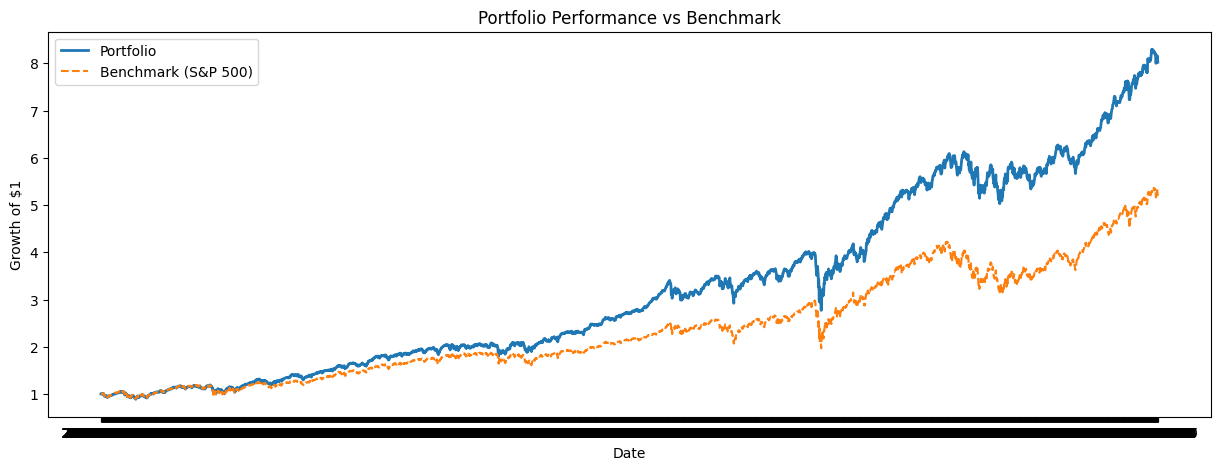

In [18]:
# Comparison using graphs : 

plt.figure(figsize=(15,5))
plt.plot(portfolio_cumulative, label='Portfolio', linewidth=2)
plt.plot(benchmark_cumulative, label='Benchmark (S&P 500)', linestyle='--')

plt.title('Portfolio Performance vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.savefig("../outputs/Figures/Portfolio Performance vs Benchmark.png")
plt.show()

In [19]:
# Conclusions : 
# 1. Portfolio clearly outperforms the benchmark in the long run
# ₹1 invested in the portfolio grows to ~₹8+, while ₹1 in the benchmark grows to ~₹5+,
# showing significant cumulative outperformance over the full period.

# 2. Portfolio outperformance is the result of consistent compounding over time, not one-off lucky events.
# 3. Portfolio maintains dominance once it establishes a performance lead,
# indicating structural strength rather than cyclical advantage.

In [20]:
# Portfolio Risk vs Benchmark Risk
# Was this portfolio worth the risk?
# Portfolio return comparison with risk analysis :
# The portfolio made more money — but how risky was it compared to the market?

In [21]:
from src.config import Trading_Days

In [22]:
# Annualized Volatility :

portfolio_volatility = portfolio_daily_returns.std()*np.sqrt(Trading_Days)
benchmark_volatility = benchmark_returns.std()*np.sqrt(Trading_Days)
benchmark_volatility = benchmark_volatility.item()

In [23]:
# Calculating rolling volatility :

rolling_window = 252

portfolio_rolling_volatility = portfolio_daily_returns.rolling(rolling_window).std()*np.sqrt(Trading_Days)
benchmark_rolling_volatility = benchmark_returns.rolling(rolling_window).std()*np.sqrt(Trading_Days)


In [24]:
# Drawdown calculations of portfolio :

portfolio_cumulative = (1 + portfolio_daily_returns).cumprod()

portfolio_running_max = portfolio_cumulative.cummax()

portfolio_drawdown = (portfolio_cumulative - portfolio_running_max) / portfolio_running_max


In [25]:
# Drawdown calculations of benchmark :

benchmark_cumulative = (1 + benchmark_returns).cumprod()

benchmark_running_max = benchmark_cumulative.cummax()

benchmark_drawdown = (benchmark_cumulative - benchmark_running_max) / benchmark_running_max


In [26]:
# Calculating maximum drawdown :

portfolio_max_dd = portfolio_drawdown.min()
benchmark_max_dd = benchmark_drawdown.min()
benchmark_max_dd = benchmark_max_dd.item()


In [27]:
# Forming risk comparison table :

risk_summary = pd.DataFrame({
    "Metric": ["Annual Volatility", "Max Drawdown"],
    "Portfolio": [portfolio_volatility, portfolio_max_dd],
    "Benchmark": [benchmark_volatility, benchmark_max_dd]
})

risk_summary


,Metric,Portfolio,Benchmark
0,Annual Volatility,0.163851,0.172374
1,Max Drawdown,-0.310424,-0.339250


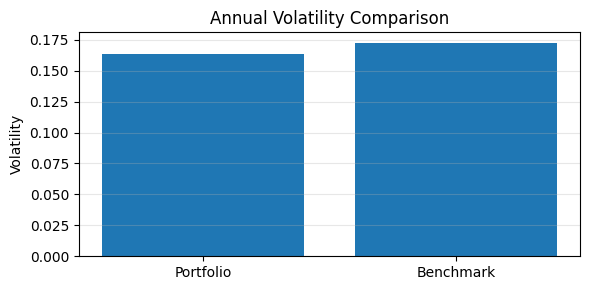

In [28]:
plt.figure(figsize=(6,3))

labels = ["Portfolio", "Benchmark"]
values = [portfolio_volatility, benchmark_volatility]

plt.bar(labels, values)
plt.title("Annual Volatility Comparison")
plt.ylabel("Volatility")

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("../outputs/Figures/Annual Volatility Comparison.png")
plt.show()


In [29]:
# Conclusions :

# 1. The portfolio exhibits lower annual volatility than the benchmark
# 2. The benchmark carries higher variability in returns
# 3. The portfolio is positioned as a more stable investment than the market

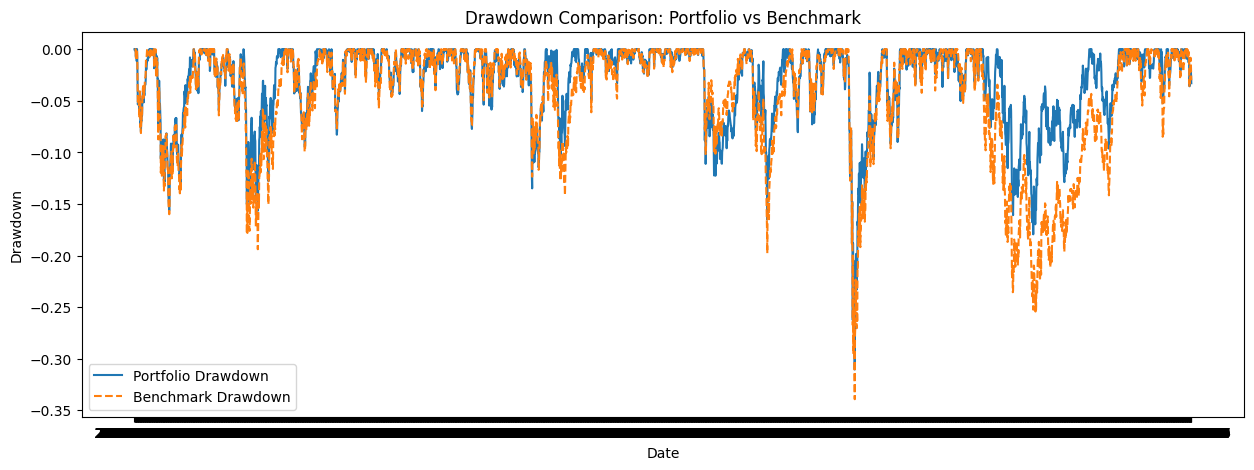

In [30]:
plt.figure(figsize=(15,5))

plt.plot(portfolio_drawdown, label="Portfolio Drawdown")
plt.plot(benchmark_drawdown, label="Benchmark Drawdown", linestyle="--")

plt.title("Drawdown Comparison: Portfolio vs Benchmark")
plt.ylabel("Drawdown")
plt.xlabel("Date")
plt.legend()
plt.savefig("../outputs/Figures/Drawdown Comparison_Portfolio vs Benchmark.png")
plt.show()


In [31]:
# This graph exists to answer one precise question:
# When losses occur, how deep and how frequent are they for the portfolio compared to the benchmark?

In [ ]:
# Conclusions : 
# 1. Benchmark experiences deeper drawdowns than the portfolio
# 2. Portfolio recovers faster to zero drawdown
# 3. From 2010 to 2024, at almost every drawdown event, the portfolio line stays above the benchmark.